In [563]:
import numpy as np
import matplotlib.pyplot as plt

In [564]:
n = 70
R,W = np.polynomial.legendre.leggauss(n)

In [565]:
a = 0
b = 1
c = 0
d = 2*np.pi

In [566]:
def f(x,y,z,r,phi):
    return -z*r/(  (x**2 + y**2 + z**2 + r**2 - 2*r*x*np.cos(phi) - 2*r*y*np.sin(phi))**(3/2)  )

In [567]:
def gz(x,y,z,R,W):
    
    r   = 0.5*((b-a)*R + a + b)
    phi = 0.5*((d-c)*R + c + d)
    
    Integral = 0.
    
    for i in range(R.shape[0]):
        for j in range(R.shape[0]):
            Integral += W[i]*W[j]*f(x,y,z,r[i],phi[j])
           
    Integral *= (b-a)*(d-c)/4
    
    return Integral

In [568]:
calibracion = gz(0.,0.,0.2,R,W)
calibracion

-5.0509512883785295

In [569]:
Mt = 5.972e24
G = 6.67e-11
Rt = 6371000

In [570]:
k = -G*Mt/(Rt**2)
k

-9.813646787366265

In [571]:
k /= calibracion 
k

1.942930396091123

In [572]:
k*gz(0.,0.,0.2,R,W)

-9.813646787366265

In [573]:
R1 = np.linspace(0,0.5,5)
Phi = np.linspace(0,2*np.pi,10)

Data = np.zeros((Phi.shape[0],R1.shape[0]))

for i in range(len(R1)):
    x,y = R1[i]*np.cos(Phi),R1[i]*np.sin(Phi)
    G = k*gz(x,y,0.2,R,W)
    Data[:,i] = G

In [574]:
Data[:,1]

array([-9.7873703, -9.7873703, -9.7873703, -9.7873703, -9.7873703,
       -9.7873703, -9.7873703, -9.7873703, -9.7873703, -9.7873703])

In [575]:
Data.mean(axis=0)

array([-9.81364679, -9.7873703 , -9.70428769, -9.54986712, -9.29262054])

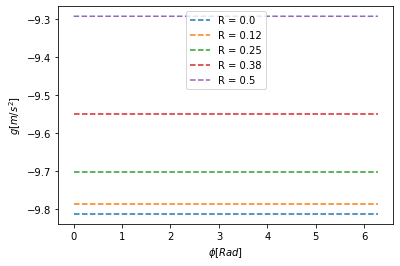

In [578]:
for i in range(R1.shape[0]):
    plt.plot(Phi,Data[:,i],'--',label='R = {:.2}'.format(R1[i]))
    
plt.xlabel(r'$\phi[Rad]$',fontsize=10)
plt.ylabel(r'$g[m/s^{2}]$',fontsize=10)
plt.legend()
#plt.savefig('Campogravitacional.pdf')

In [581]:
k*gz(0,0.5,0.2,R,W)

-9.292620425938756

In [582]:
k*gz(0,1,0.2,R,W)

-4.673112853773402